In [147]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [148]:
with open('NBA Champion RawData.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)

In [149]:
champion_share_index = data[0].index('champion share')
for i in range(len(data)):
    data[i].pop(champion_share_index)

In [150]:
champion_index = data[0].index('champion')
data_np = np.array(data[1:])
labels = data_np[:, champion_index]
features = np.delete(data_np, champion_index, axis=1)

In [151]:
training_features, validation_features, training_labels, validation_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [152]:
feature_names = np.delete(data[0], champion_index)
label_names = ['champion']

train_features_df = pd.DataFrame(training_features, columns=feature_names)
train_labels_df = pd.DataFrame(training_labels, columns=label_names)
validation_features_df = pd.DataFrame(validation_features, columns=feature_names)
validation_labels_df = pd.DataFrame(validation_labels, columns=label_names)

In [153]:
# Selecting specific columns from the dataframe for further analysis
selected_columns = ['rk conference', 'sum mvp shares', 'Conference OR', 'overall record', 'MOV']
train_features_df = train_features_df[selected_columns]
validation_features_df = validation_features_df[selected_columns]

In [154]:
train_features_df.head()

,rk conference,sum mvp shares,Conference OR,overall record,MOV
0,1,0.021,0.500813008,0.646341463,4.45
1,5,0.067,0.52601626,0.658536585,5.24
2,9,0,0.489837398,0.451219512,-3.4
3,11,0.059,0.530487805,0.317073171,-6.35
4,2,0,0.522134546,0.628571429,2.8


In [155]:
class_weights = {'0': 1, '1': 22}
dt_classifier = DecisionTreeClassifier(max_depth=5, class_weight=class_weights)
dt_classifier.fit(train_features_df, training_labels)

training_predictions = dt_classifier.predict(train_features_df)
training_accuracy = accuracy_score(training_labels, training_predictions)
print("Training Accuracy:", training_accuracy)

validation_predictions = dt_classifier.predict(validation_features_df)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print("Validation Accuracy:", validation_accuracy)

training_conf_matrix = confusion_matrix(training_labels, training_predictions)
tn_train, fp_train, fn_train, tp_train = training_conf_matrix.ravel()
false_negative_rate_train = fn_train / (fn_train + tp_train)
print("Training False Negative Rate:", false_negative_rate_train)

validation_conf_matrix = confusion_matrix(validation_labels, validation_predictions)
tn_val, fp_val, fn_val, tp_val = validation_conf_matrix.ravel()
false_negative_rate_val = fn_val / (fn_val + tp_val)
print("Validation False Negative Rate:", false_negative_rate_val)

Training Accuracy: 0.9088820826952527
Validation Accuracy: 0.9051987767584098
Training False Negative Rate: 0.03389830508474576
Validation False Negative Rate: 0.06666666666666667


In [156]:
from joblib import dump
dump(dt_classifier, 'dt_classifier.joblib')

['dt_classifier.joblib']

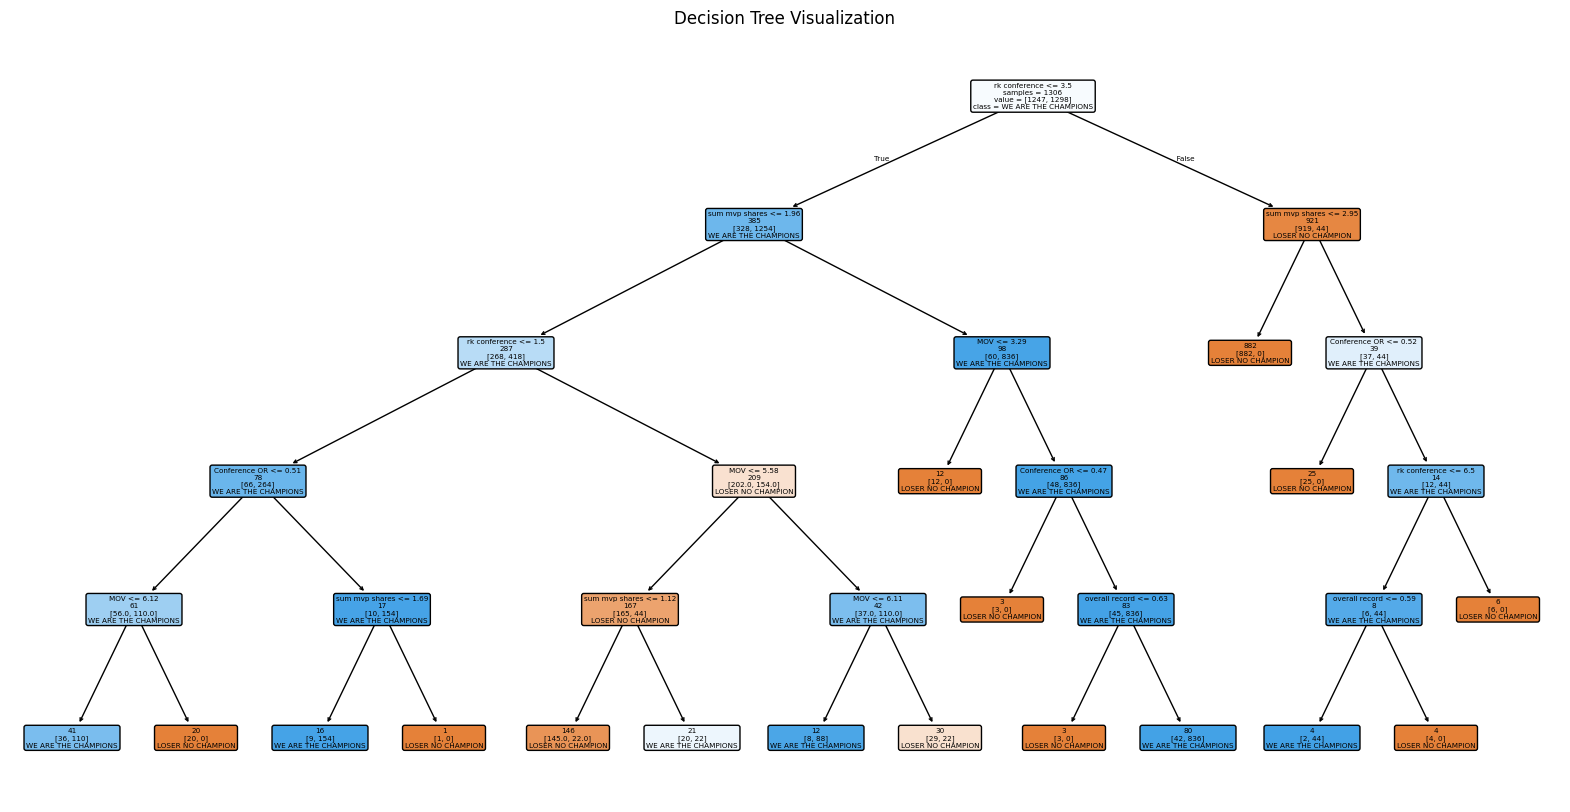

In [157]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
tree_plot = plot_tree(dt_classifier, filled=True, feature_names=train_features_df.columns, class_names=["LOSER NO CHAMPION", "WE ARE THE CHAMPIONS"], label='root', impurity=False, proportion=False, rounded=True, precision=2)
plt.title("Decision Tree Visualization")
plt.show()

In [158]:
y_scores = dt_classifier.predict_proba(validation_features_df)[:, 1]

# from sklearn.metrics import roc_curve
# # Explicitly specifying pos_label as '1' since validation_labels are in {'0', '1'}
# fpr, tpr, thresholds = roc_curve(validation_labels, y_scores, pos_label='1')
# plt.plot(fpr, tpr)
# plt.show()
